# **Mental Health in Tech Survey Project**
This dataset contains the following data:

**Timestamp**

**Age**

**Gender**

**Country **

**state**: If you live in the United States, which state or territory do you live in?

**self_employed:** Are you self-employed?

**family_history:** Do you have a family history of mental illness?

**treatment**: Have you sought treatment for a mental health condition?
work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

**no_employees:** How many employees does your company or organization have?

**remote_work:** Do you work remotely (outside of an office) at least 50% of the time?

**tech_company**: Is your employer primarily a tech company/organization?

**benefits: **Does your employer provide mental health benefits?

**care_options:** Do you know the options for mental health care your employer provides?

**wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
leave: How easy is it for you to take medical leave for a mental health condition?



**mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?

**physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers:** Would you be willing to discuss a mental health issue with your coworkers?

**Supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mentalhealthinterview:** Would you bring up a mental health issue with a potential employer in an interview?

***physhealthinterview:*** Would you bring up a physical health issue with a potential employer in an interview?

**mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?

**Observation_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

# **1 DATA COLLECTION**

**Importing the important Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Loading Dataset

In [2]:
df = pd.read_csv('mental_health.csv')
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 14:23,27,Male,United States,TN,No,No,No,Sometimes,100-500,No,Yes,Yes,Not sure,Yes,Yes,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,The thought of going through my employer direc...
1,27-08-2014 14:23,25,Male,Canada,NaN,No,No,Yes,Often,Jun-25,Yes,No,Don't know,No,No,Don't know,Don't know,Somewhat difficult,Yes,Maybe,No,No,No,Maybe,Don't know,No,NaN
2,27-08-2014 14:24,35,male,United States,OR,No,No,Yes,Rarely,100-500,No,Yes,Yes,Not sure,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
3,27-08-2014 14:25,36,Male,United States,WA,Yes,No,Yes,Never,01-May,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,Yes,No,No,Yes,No,NaN
4,27-08-2014 14:25,26,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  899 non-null    object
 1   Age                        899 non-null    int64 
 2   Gender                     899 non-null    object
 3   Country                    899 non-null    object
 4   state                      535 non-null    object
 5   self_employed              899 non-null    object
 6   family_history             899 non-null    object
 7   treatment                  899 non-null    object
 8   work_interfere             711 non-null    object
 9   no_employees               899 non-null    object
 10  remote_work                899 non-null    object
 11  tech_company               899 non-null    object
 12  benefits                   899 non-null    object
 13  care_options               899 non-null    object
 14  wellness_p



1. here clearly we can see that apart from the 'Age' columns, all columns are in catrgoircal type.
2. latter we will convert them into numeric form.



**Cheking shape of DATASET**

In [4]:
df.shape

(899, 27)

here we have 900 samples with 27 features.

# **2 DATA CLEANING**

cheking the missing values

In [5]:
df.isnull().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        364
self_employed                  0
family_history                 0
treatment                      0
work_interfere               188
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     785
dtype: int64

In [6]:
data = df.drop(['comments','Timestamp','state'], axis = 1)

In [7]:

data['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
data['work_interfere'].fillna('Sometimes', inplace = True)
data['work_interfere'].unique()



array(['Sometimes', 'Often', 'Rarely', 'Never'], dtype=object)

In [9]:
data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

**Treatment of Gender columns**

In [10]:
data['Gender']=[m.lower() for m in data['Gender']]
data['Gender'].value_counts()

male                        570
female                      135
m                           118
f                            37
make                          4
woman                         3
male                          2
man                           2
female (trans)                2
female                        2
cis male                      2
fluid                         1
msle                          1
non-binary                    1
femail                        1
trans woman                   1
cis-female/femme              1
p                             1
all                           1
androgyne                     1
neuter                        1
mail                          1
genderqueer                   1
malr                          1
femake                        1
agender                       1
enby                          1
nah                           1
queer                         1
a little about you            1
male leaning androgynous      1
guy (-is



1.   We have a majority of males in our dataset compared to females and other categories.




In [11]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle",
            "mail", "malr","cis man", "Cis Male", "cis male"]


trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all",
             "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^",
             "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           

female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]


In [12]:
for (row,col) in data.iterrows():
    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    
    elif str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace = col.Gender, value = 'female', inplace = True)
        
    elif str.lower(col.Gender) in trans_str:
        data["Gender"].replace(to_replace = col.Gender, value = 'trans', inplace = True)
        
    else:
        pass
    

In [13]:
data['Gender']=[m.lower() for m in data['Gender']]
data['Gender'].value_counts()

male                  701
female                181
trans                  15
a little about you      1
p                       1
Name: Gender, dtype: int64

In [14]:
stk_list = ['a little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

In [15]:
data['Gender'].unique()

array(['male', 'female', 'trans'], dtype=object)

In [16]:
data.shape

(897, 24)

**Tretment of Age columns**

In [17]:
data['Age'].unique()

array([         27,          25,          35,          36,          26,
                30,          29,          22,          41,          32,
                24,          33,          31,          45,          46,
                23,          54,          34,         329,          28,
                21,          55,          42, 99999999999,          40,
                48,          20,          39,          37,          43,
                38,          57,          58,          18,          47,
                62,          51,          65,          50,          19,
                56,          49,       -1726,           5,          44,
                53,          61,          11,          72])

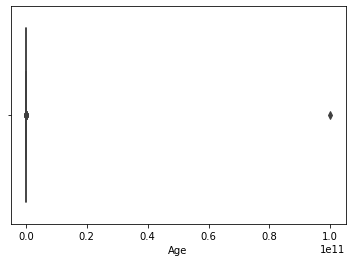

In [18]:
sns.boxplot(data['Age'])

In [19]:
data.drop(data[data['Age'] < 0].index, inplace = True) 
data.drop(data[data['Age'] > 100].index, inplace = True) 

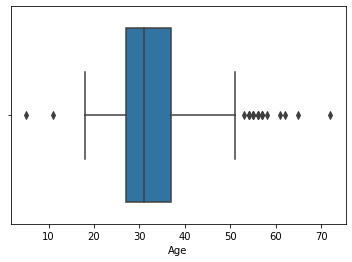

In [20]:
sns.boxplot(data['Age'])

# **DATA ENCODING**

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data_ = data.iloc[:,1:]
encoded_data = data_.apply(LabelEncoder().fit_transform)

In [22]:
fin_encoded_data = pd.concat([data['Age'],encoded_data], axis = 1)

In [23]:
fin_encoded_data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,27,1,39,0,0,0,3,1,0,1,2,1,2,2,0,0,0,1,1,2,1,0,0,0
1,25,1,6,0,0,1,1,4,1,0,0,0,1,0,0,1,2,0,0,0,1,0,0,0
2,35,1,39,0,0,1,2,1,0,1,2,1,0,2,0,0,1,1,1,2,1,1,0,0
3,36,1,39,1,0,1,0,0,0,1,1,2,1,1,0,2,0,1,1,2,1,1,2,0
4,26,1,39,0,1,1,3,5,0,1,2,1,1,0,0,0,2,1,0,0,1,1,1,0


**Summary of Dataframe**

In [24]:
country = data.groupby(data['Country'])

In [25]:
country['Age'].median().sort_values()

Country
Georgia                   20.0
India                     23.0
Austria                   24.0
Bosnia and Herzegovina    25.0
Nigeria                   25.0
Uruguay                   26.0
Russia                    26.0
Moldova                   26.0
Colombia                  26.0
Israel                    26.0
Finland                   26.0
Hungary                   27.0
Sweden                    28.0
Brazil                    28.0
Australia                 28.5
Canada                    29.0
France                    29.0
Latvia                    29.0
Bulgaria                  29.0
Romania                   29.0
Switzerland               30.0
Belgium                   30.0
Spain                     30.0
Singapore                 30.0
New Zealand               30.0
Germany                   30.0
South Africa              31.0
United Kingdom            32.0
United States             32.0
Italy                     33.0
Norway                    33.0
Netherlands               34.0


In [26]:
country['treatment','remote_work','self_employed'].describe()

treatment              ... self_employed          
                           count unique  top  ...        unique  top freq
Country                                       ...                        
Australia                     16      2  Yes  ...             1   No   16
Austria                        1      1   No  ...             1  Yes    1
Belgium                        6      2   No  ...             1   No    6
Bosnia and Herzegovina         1      1   No  ...             1   No    1
Brazil                         5      2   No  ...             2   No    3
Bulgaria                       2      1  Yes  ...             1   No    2
Canada                        43      2  Yes  ...             2   No   36
China                          1      1   No  ...             1  Yes    1
Colombia                       1      1   No  ...             1   No    1
Croatia                        2      1  Yes  ...             2   No    1
Denmark                        2      1  Yes  ...             1  Yes    2
Finland                        2      1   No  ...             1   No    2
France                         9      2   No  ...             2   No    8
Georgia                        1      1   No  ...             1   No    1
Germany                       41      2   No  ...             2   No   30
Greece                         1      1   No  ...             1   No    1
Hungary                        1      1   No  ...             1  Yes    1
India                          8      2   No  ...             2   No    6
Ireland                       15      2  Yes  ...             2   No   11
Israel                         5      1   No  ...             1   No    5
Italy                          6      2   No  ...             1   No    6
Japan                          1      1  Yes  ...             1  Yes    1
Latvia                         1      1   No  ...             1   No    1
Mexico                         1      1   No  ...             1  Yes    1
Moldova                        1      1  Yes  ...             1   No    1
Netherlands                   20      2   No  ...             2   No   14
New Zealand                    8      2  Yes  ...             1   No    8
Nigeria                        1      1   No  ...             1   No    1
Norway                         1      1   No  ...             1   No    1
Poland                         3      2   No  ...             2   No    2
Romania                        1      1   No  ...             1   No    1
Russia                         1      1   No  ...             1   No    1
Singapore                      3      1   No  ...             1   No    3
South Africa                   3      2  Yes  ...             2   No    2
Spain                          1      1   No  ...             1   No    1
Sweden                         6      2   No  ...             1   No    6
Switzerland                    5      2  Yes  ...             1   No    5
Thailand                       1      1   No  ...             1  Yes    1
United Kingdom               128      2  Yes  ...             2   No  109
United States                538      2  Yes  ...             2   No  492
Uruguay                        1      1   No  ...             1   No    1

[41 rows x 12 columns]



1.  from this we find out that countries like united States, Austriallia, and Canada have more sureyed people who undergo a treatment for mental problems.




**Self_employed VS treatment**

In [27]:
s_employ = data.groupby(['self_employed'])
s_employ['treatment'].describe()

,count,unique,top,freq
self_employed,,,,
No,785,2,Yes,400
Yes,109,2,Yes,59


**Treatment VS 'Age**

In [28]:
treat = data.groupby(data['treatment'])
treat['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
No,435.0,31.795402,7.393606,5.0,27.0,31.0,36.0,65.0
Yes,459.0,32.976035,7.728292,18.0,27.0,32.0,37.0,72.0


**treatment VS 'Tech_company' And 'Work_interfere'**

In [29]:
treat['tech_company', 'work_interfere'].describe()

tech_company                  work_interfere                       
                 count unique  top freq          count unique        top freq
treatment                                                                    
No                 435      2  Yes  352            435      4  Sometimes  263
Yes                459      2  Yes  368            459      4  Sometimes  264



1. Form this, we get to know that people who work in tech_company are so much mentally affected by their work whether they are taking or not.



**Tretment VS 'benefit' and 'care_options'**

In [30]:
treat['benefits'].describe()

,count,unique,top,freq
treatment,,,,
No,435,3,Don't know,187
Yes,459,3,Yes,212




1. From this, we get to know that some people don't know that companies provide the mental health benefits to the person or not nd those people are not taking trement.




**Treatment VS wellness_program**

In [31]:
treat['wellness_program'].describe()

,count,unique,top,freq
treatment,,,,
No,435,3,No,283
Yes,459,3,No,304


**How easy is to take medical 'leave' for a mental Health condition.**

In [32]:
pd.DataFrame(data['leave'].value_counts(normalize = True))

,leave
Don't know,0.453020
Somewhat easy,0.200224
Very easy,0.171141
Somewhat difficult,0.099553
Very difficult,0.076063


**Discussing a mental Health issue with employer would have negative consequeces**

In [33]:
pd.DataFrame(data['mental_health_consequence'].value_counts(normalize = True))

,mental_health_consequence
Maybe,0.385906
No,0.375839
Yes,0.238255




1. From here, approx 38% people thinks'No' Mental_health_Consequences if they share.
2. and 23 % thinks that would be negative consequences.



**Disscussing a physical health issue with your employer would have negative consequences?**

In [34]:
pd.DataFrame(data['phys_health_consequence'].value_counts())

,phys_health_consequence
No,649
Maybe,203
Yes,42


**Discuss a mental Health issue with your direct supervior(S)**


In [35]:
pd.DataFrame(data['supervisor'].value_counts(normalize = True))

,supervisor
Yes,0.398210
No,0.317673
Some of them,0.284116


**Discuss a mental Health Issue with your Coworkers**

In [36]:
pd.DataFrame(data['coworkers'].value_counts(normalize = True))

,coworkers
Some of them,0.617450
No,0.215884
Yes,0.166667


**Mental health issue with a potential employer in an interview**

In [37]:
pd.DataFrame(data['mental_health_interview'].value_counts(normalize=  True))

,mental_health_interview
No,0.816555
Maybe,0.153244
Yes,0.030201




1. there are 81 of people they don't like to share mental health issues during interview.
2. There ara 3% of people they can share mental health issues during interview.



**Physical Health issus with a potential in an interview?**

In [38]:
pd.DataFrame(data['phys_health_interview'].value_counts(normalize = True))

,phys_health_interview
Maybe,0.442953
No,0.409396
Yes,0.147651


Mental VS physical

In [39]:
pd.DataFrame(data['mental_vs_physical'].value_counts(normalize = True))

,mental_vs_physical
Don't know,0.445190
No,0.277405
Yes,0.277405


**Observation negative consequence for Coworkers with mental health conditions in your workplace**

In [40]:
pd.DataFrame(data['obs_consequence'].value_counts(normalize = True))

,obs_consequence
No,0.848993
Yes,0.151007


# Visualization of data

***Age Distribution***


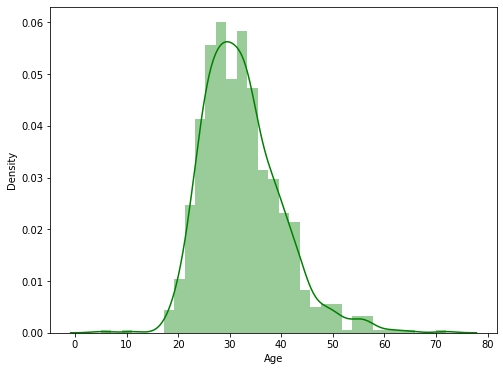

In [41]:
plt.figure(figsize = (8,6))
sns.distplot(data['Age'], color=  'g')

treatment vs Gender

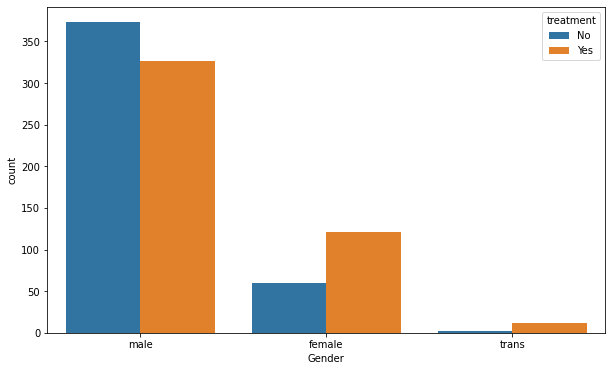

In [42]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Gender', data = data,hue = 'treatment')
plt.show()

Country-wise gender ratio participating in the survey

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

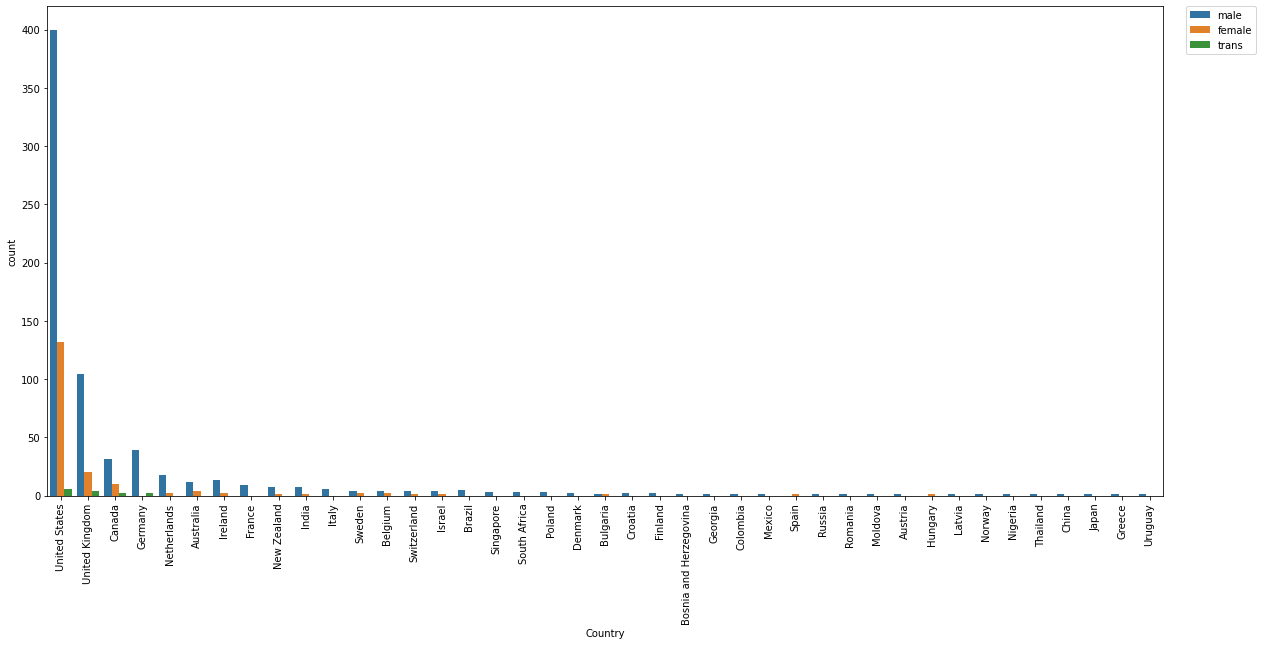

In [43]:
#shows that more number of males are working in tech companies all over the world
plt.figure(figsize= (20,9))
sns.countplot(x='Country', order= data['Country'].value_counts().index, hue='Gender', data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

More number of males are working in tech companies all over the world.

**country wise representation of data with focus on india**

Text(10, 20.5, 'Mental Health Survey Participants from India')

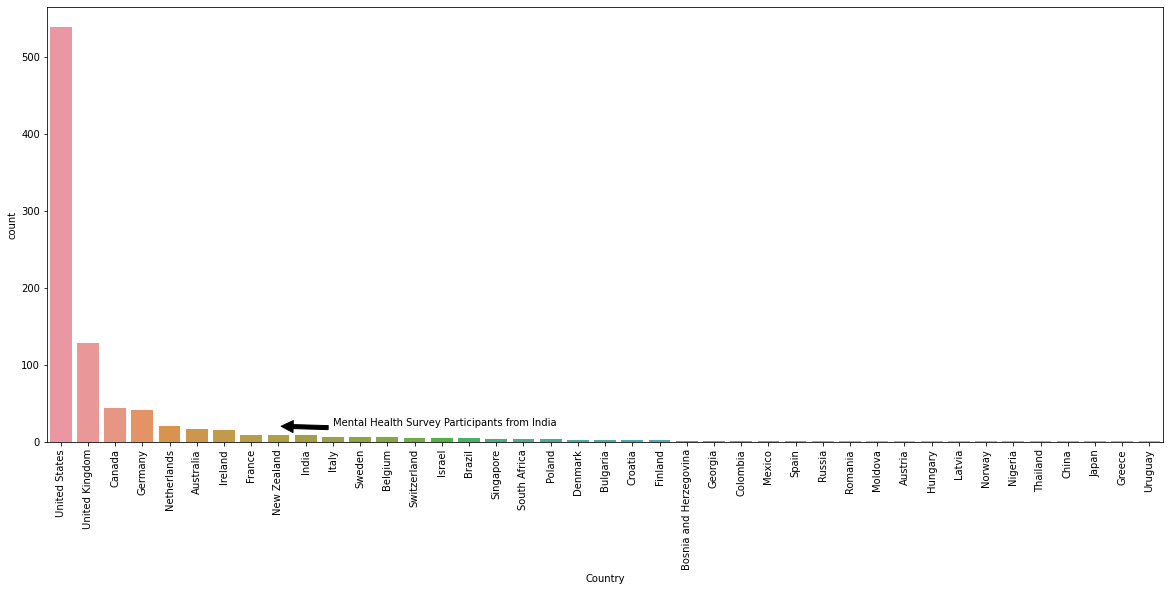

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(data.Country, order= data['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.annotate('Mental Health Survey Participants from India', xy=(8, 20), xytext=(10, 20.5),
             arrowprops=dict(facecolor='black', shrink=0.05),)

**family-history VS treatment**

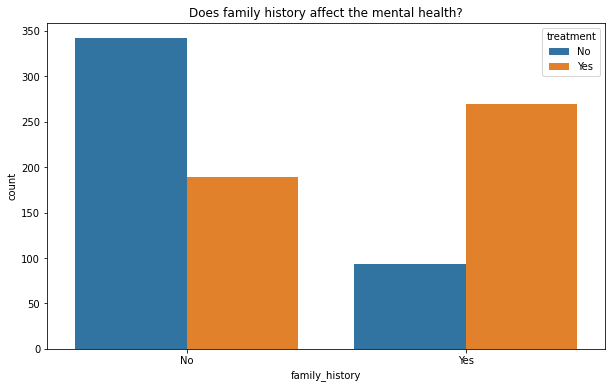

In [45]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'family_history', data = data, hue = 'treatment')
plt.title('Does family history affect the mental health?')
plt.show()






*   More person go for the treatment if they have family history of mental illness.





**Work-interfere**

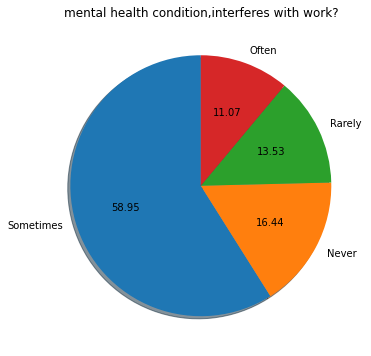

In [46]:
plt.figure(figsize = (10,6))
v = data['work_interfere'].value_counts()
label = ['Sometimes', 'Never', 'Rarely', 'Often']
plt.pie(v, labels = label, autopct = '%0.02f', radius = 1,shadow= True, startangle = 90)
plt.title('mental health condition,interferes with work?')
plt.show()

**Work-interfere VS treatment**

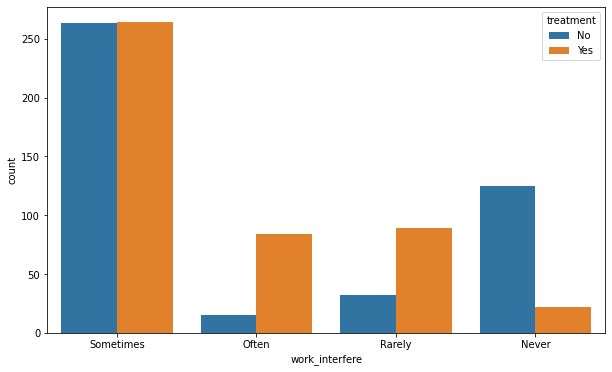

In [47]:
plt.figure(figsize = (10,6))
sns.countplot(x =  'work_interfere', data = data, hue = 'treatment')
plt.show()

**Remote work**

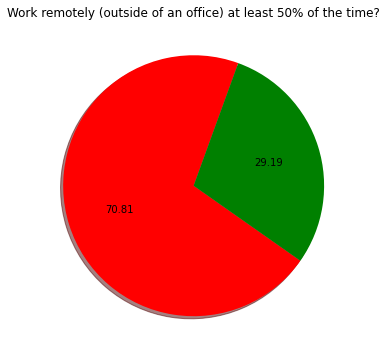

In [48]:
plt.figure(figsize = (10,6))
value = data['remote_work'].value_counts()
plt.pie(value, colors = ['r','g'], autopct=  '%0.02f', startangle = 70,shadow = True, radius = 1)
plt.title('Work remotely (outside of an office) at least 50% of the time?')
plt.show()


**Benefits**

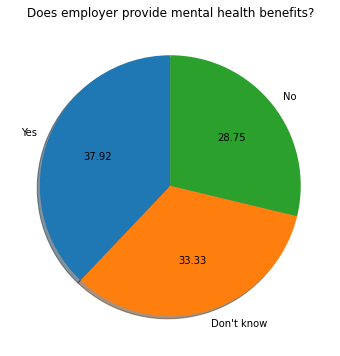

In [49]:
plt.figure(figsize = (10,6))
value = data['benefits'].value_counts()

plt.pie(value, autopct = '%0.02f', labels = ['Yes', 'Don\'t know', 'No'], startangle = 90, shadow = True)
plt.title('Does employer provide mental health benefits?')
plt.show()

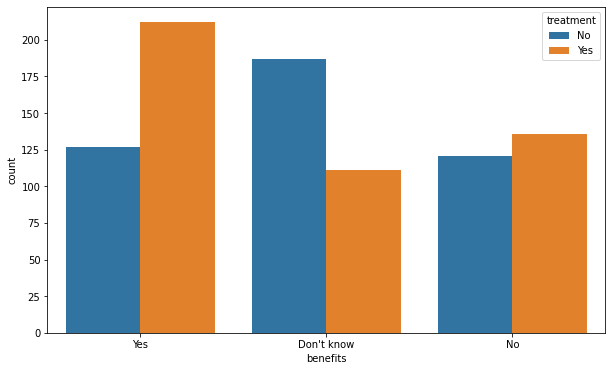

In [50]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'benefits', data = data, hue = 'treatment')
plt.show()

**Wellness-program**

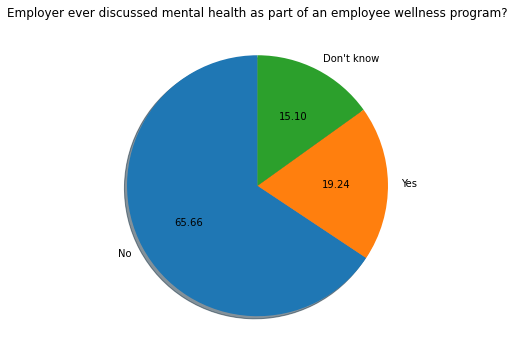

In [51]:
plt.figure(figsize = (10,6))
value = data['wellness_program'].value_counts()
plt.title('Employer ever discussed mental health as part of an employee wellness program?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Yes', 'Don\'t know'], startangle = 90, shadow = True)
plt.show()

**Anonymity**

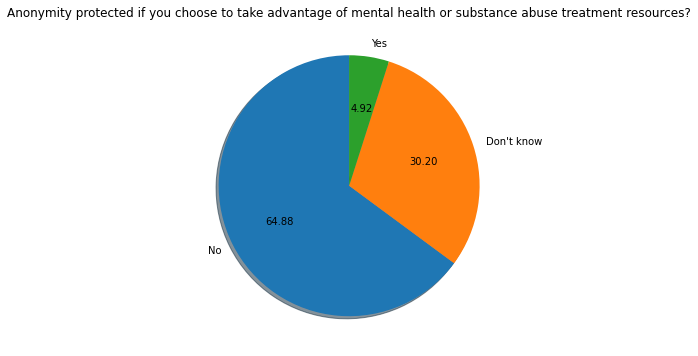

In [52]:
plt.figure(figsize = (10,6))
value = data['anonymity'].value_counts()
plt.title('Anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Don\'t know', 'Yes'], startangle = 90, shadow = True)
plt.show()

**Phys-health-interview**

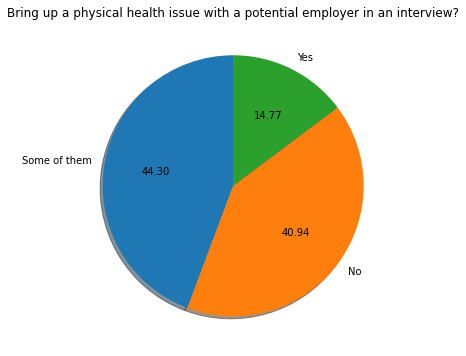

In [53]:
plt.figure(figsize = (10,6))
value = data['phys_health_interview'].value_counts()
plt.title('Bring up a physical health issue with a potential employer in an interview?')
plt.pie(value, autopct = '%0.02f', labels=  ['Some of them', 'No', 'Yes'], startangle = 90, shadow = True)
plt.show()

**Mental- Vs - Physical health**

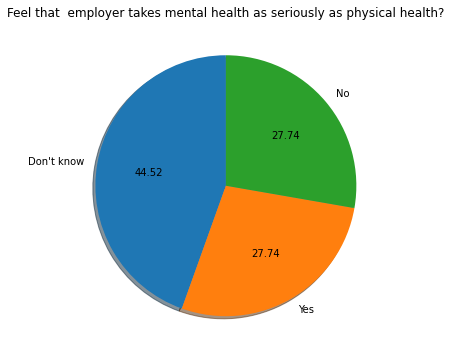

In [54]:
plt.figure(figsize = (10,6))
value = data['mental_vs_physical'].value_counts()
plt.title('Feel that  employer takes mental health as seriously as physical health?')
plt.pie(value, autopct = '%0.02f', labels=  ['Don\'t know', 'Yes', 'No'], startangle = 90, shadow = True)
plt.show()

**Observation of Consequence**

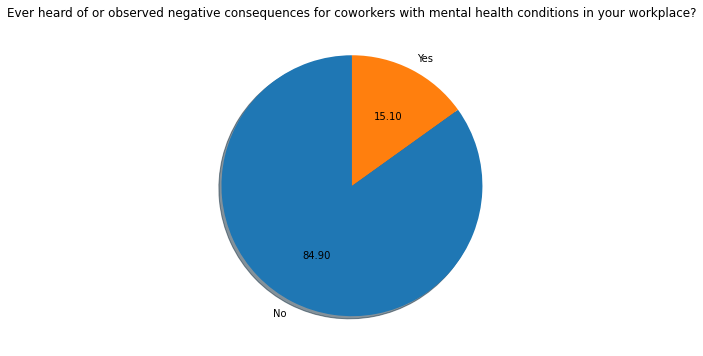

In [55]:
plt.figure(figsize = (10,6))
value = data['obs_consequence'].value_counts()
plt.title('Ever heard of or observed negative consequences for coworkers with mental health conditions in your workplace?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Yes'], startangle = 90, shadow = True)
plt.show()

# **End of the Data processing of Mental Health in Tech Survey Thank you**